In [501]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns # For Visualization 


In [502]:
df= pd.read_excel("flight_dataset.xlsx")
x=df.iloc[:,:-1].values
y=df.iloc[:,5].values
df

,Flight Date,Airline,From,To,Flight Duration (min),Price
0,20.12.2023,Anadolujet,ADA,ESB,65,"936,99"
1,20.12.2023,Anadolujet,ADA,ESB,65,"936,99"
2,20.12.2023,Sunexpress,ADA,AYT,75,"1264,99"
3,20.12.2023,Sunexpress,ADA,AYT,75,"1464,99"
4,20.12.2023,Pegasus,ADA,AYT,65,"1579,99"
...,...,...,...,...,...,...
994,25.12.2023,Pegasus,SAW,VAN,130,"1484,99"
995,25.12.2023,Anadolujet,SAW,VAN,125,"1509,99"
996,25.12.2023,Sunexpress,ADB,KSY,130,"1614,99"
997,25.12.2023,Sunexpress,ADB,ASR,90,"1364,99"


# Preprocessing

In [503]:
#We're checking if there is null value in columns
df.isnull()

,Flight Date,Airline,From,To,Flight Duration (min),Price
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
994,False,False,False,False,False,False
995,False,False,False,False,False,False
996,False,False,False,False,False,False
997,False,False,False,False,False,False


Duplicated rows count: 250


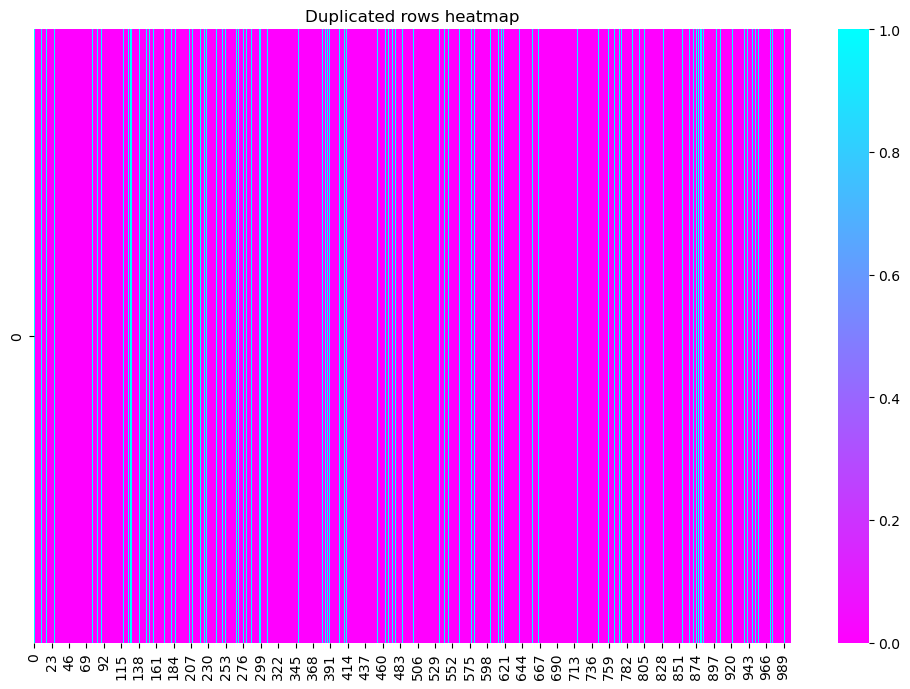

In [504]:
duplicated_rows = df[df.duplicated(keep=False)]
print("Duplicated rows count:", duplicated_rows.shape[0])

heatmap_data = df.duplicated().values
plt.figure(figsize=(10, 7))
sns.heatmap([heatmap_data], cmap='cool_r')
plt.title('Duplicated rows heatmap')
plt.show()


We have so many duplicated row, we have to delete these.

In [505]:
#Drop duplicate datas
df.drop_duplicates()


,Flight Date,Airline,From,To,Flight Duration (min),Price
0,20.12.2023,Anadolujet,ADA,ESB,65,"936,99"
2,20.12.2023,Sunexpress,ADA,AYT,75,"1264,99"
3,20.12.2023,Sunexpress,ADA,AYT,75,"1464,99"
4,20.12.2023,Pegasus,ADA,AYT,65,"1579,99"
5,20.12.2023,Türk Hava Yolları,ADA,IST,110,"1492,99"
...,...,...,...,...,...,...
994,25.12.2023,Pegasus,SAW,VAN,130,"1484,99"
995,25.12.2023,Anadolujet,SAW,VAN,125,"1509,99"
996,25.12.2023,Sunexpress,ADB,KSY,130,"1614,99"
997,25.12.2023,Sunexpress,ADB,ASR,90,"1364,99"


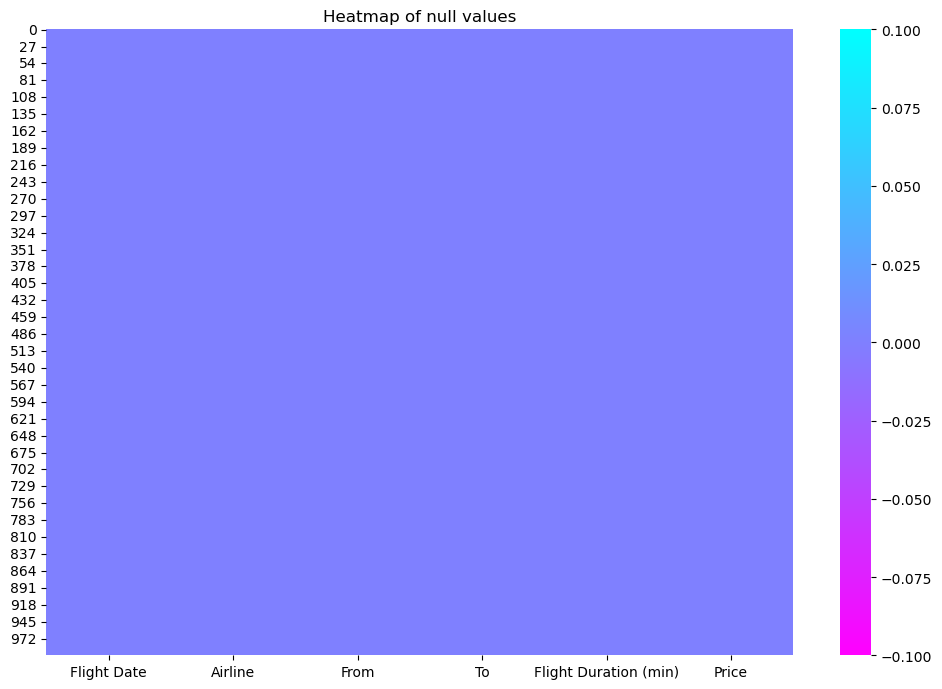

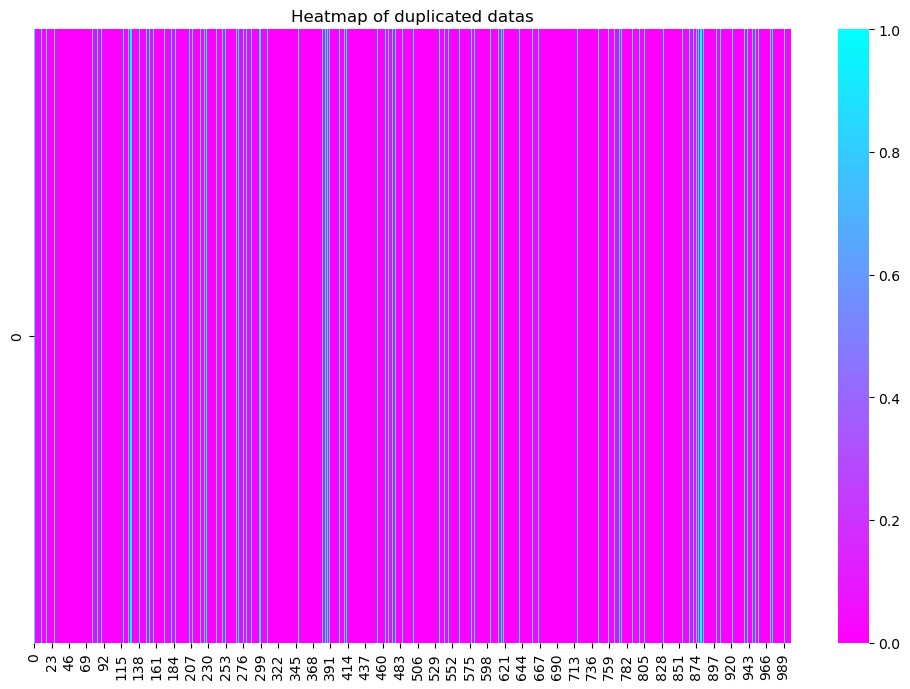

In [506]:
#Dataset doesn't contain null values.
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(), cmap= 'cool_r')
plt.title('Heatmap of null values')
plt.show()

#Dataset doesn't contain duplicated values.
heatmap_data = df.duplicated().values
plt.figure(figsize=(10, 7))
sns.heatmap([heatmap_data], cmap='cool_r')
plt.title('Heatmap of duplicated datas')
plt.show()


In [507]:
df['Price'].unique()

array(['936,99', '1264,99', '1464,99', '1579,99', '1492,99', '1599,99',
       '1144,99', '1354,99', '1379,99', '1313,99', '1314,99', '1364,99',
       '1401,99', '630,99', '642,99', '741,99', '1050,99', '1149,99',
       '841,99', '941,99', '1297,99', '641,99', '992,99', '1150,99',
       '1148,99', '1249,99', '1514,99', '884,99', '590,99', '643,99',
       '1114,99', '1214,99', '1737,99', '1614,99', '1664,99', '1292,99',
       '1329,99', '1192,99', '1699,99', '1244,99', '1478,99', '1479,99',
       '1710,99', '1919,99', '1392,99', '1142,99', '1045,99', '784,99',
       '991,99', '1397,99', '1034,99', '1197,99', '1497,99', '1704,99',
       '559,99', '719,99', '1147,99', '679,99', '843,99', '993,99',
       '943,99', '1031,99', '966,99', '1385,99', '1334,99', '1585,99',
       '1338,99', '1359,99', '1047,99', '1486,99', '836,99', '1519,99',
       '1164,99', '1328,99', '1725,99', '670,99', '842,99', '1386,99',
       '1564,99', '578,99', '586,99', '1485,99', '1042,99', '1504,99',
   

In [508]:
df.head()

,Flight Date,Airline,From,To,Flight Duration (min),Price
0,20.12.2023,Anadolujet,ADA,ESB,65,"936,99"
1,20.12.2023,Anadolujet,ADA,ESB,65,"936,99"
2,20.12.2023,Sunexpress,ADA,AYT,75,"1264,99"
3,20.12.2023,Sunexpress,ADA,AYT,75,"1464,99"
4,20.12.2023,Pegasus,ADA,AYT,65,"1579,99"


In [509]:
df["Airline"].value_counts()


Airline
Anadolujet           367
Pegasus              261
Türk Hava Yolları    254
Sunexpress           117
Name: count, dtype: int64

In [510]:
print(df['Airline'].unique())
print(df['From'].unique())
print(df['To'].unique())



['Anadolujet' 'Sunexpress' 'Pegasus' 'Türk Hava Yolları']
['ADA' 'ESB' 'AYT' 'GZP' 'EDO' 'DIY' 'EZS' 'ERZ' 'GZT' 'HTY' 'IST' 'SAW'
 'ADB' 'TZX']
['ESB' 'AYT' 'IST' 'SAW' 'ADB' 'VAN' 'GZP' 'DIY' 'EZS' 'ERZ' 'GZT' 'KSY'
 'MLX' 'BJV' 'OGU' 'RZV' 'GNY' 'TZX' 'ASR' 'SZF' 'KYA' 'DLM' 'NAV' 'NOP'
 'VAS']


In [511]:
print(df['Flight Date'].isnull().values.any())
print(df['Airline'].isnull().values.any())
print(df['From'].isnull().values.any())
print(df['To'].isnull().values.any())
print(df['Flight Duration (min)'].isnull().values.any())

False
False
False
False
False


## Encoding Dates

In [512]:
df['Flight Date'] = pd.to_datetime(df['Flight Date'], format='%d.%m.%Y', dayfirst=True)
df['DayOfWeek']=df['Flight Date'].dt.dayofweek
df.drop('Flight Date',axis=1)
df_dummy_dayofweek = pd.get_dummies(df, columns=["DayOfWeek"], dtype=int)
df_dummy_dayofweek


,Flight Date,Airline,From,To,Flight Duration (min),Price,DayOfWeek_0,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,2023-12-20,Anadolujet,ADA,ESB,65,"936,99",0,1,0,0,0,0
1,2023-12-20,Anadolujet,ADA,ESB,65,"936,99",0,1,0,0,0,0
2,2023-12-20,Sunexpress,ADA,AYT,75,"1264,99",0,1,0,0,0,0
3,2023-12-20,Sunexpress,ADA,AYT,75,"1464,99",0,1,0,0,0,0
4,2023-12-20,Pegasus,ADA,AYT,65,"1579,99",0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,2023-12-25,Pegasus,SAW,VAN,130,"1484,99",1,0,0,0,0,0
995,2023-12-25,Anadolujet,SAW,VAN,125,"1509,99",1,0,0,0,0,0
996,2023-12-25,Sunexpress,ADB,KSY,130,"1614,99",1,0,0,0,0,0
997,2023-12-25,Sunexpress,ADB,ASR,90,"1364,99",1,0,0,0,0,0


#### Why we used dummy for dates?

We could have used day of week as index. for example 0 for Monday if we do like this, machine could find wrong relative between columns. Like ratio etc. and it's undesirable

## Processing for Price Column

In [513]:
df['Price'] = df['Price'].str.replace(',', '.').astype(float)
df

,Flight Date,Airline,From,To,Flight Duration (min),Price,DayOfWeek
0,2023-12-20,Anadolujet,ADA,ESB,65,936.99,2
1,2023-12-20,Anadolujet,ADA,ESB,65,936.99,2
2,2023-12-20,Sunexpress,ADA,AYT,75,1264.99,2
3,2023-12-20,Sunexpress,ADA,AYT,75,1464.99,2
4,2023-12-20,Pegasus,ADA,AYT,65,1579.99,2
...,...,...,...,...,...,...,...
994,2023-12-25,Pegasus,SAW,VAN,130,1484.99,0
995,2023-12-25,Anadolujet,SAW,VAN,125,1509.99,0
996,2023-12-25,Sunexpress,ADB,KSY,130,1614.99,0
997,2023-12-25,Sunexpress,ADB,ASR,90,1364.99,0


## Encoding with Dummy

In [514]:
df_dummies_others = pd.get_dummies(df, columns=["Airline","From","To"], dtype=int)
df_dummies_others

,Flight Date,Flight Duration (min),Price,DayOfWeek,Airline_Anadolujet,Airline_Pegasus,Airline_Sunexpress,Airline_Türk Hava Yolları,From_ADA,From_ADB,...,To_MLX,To_NAV,To_NOP,To_OGU,To_RZV,To_SAW,To_SZF,To_TZX,To_VAN,To_VAS
0,2023-12-20,65,936.99,2,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2023-12-20,65,936.99,2,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2023-12-20,75,1264.99,2,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2023-12-20,75,1464.99,2,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2023-12-20,65,1579.99,2,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2023-12-25,130,1484.99,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
995,2023-12-25,125,1509.99,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
996,2023-12-25,130,1614.99,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
997,2023-12-25,90,1364.99,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# VISUALIZATION

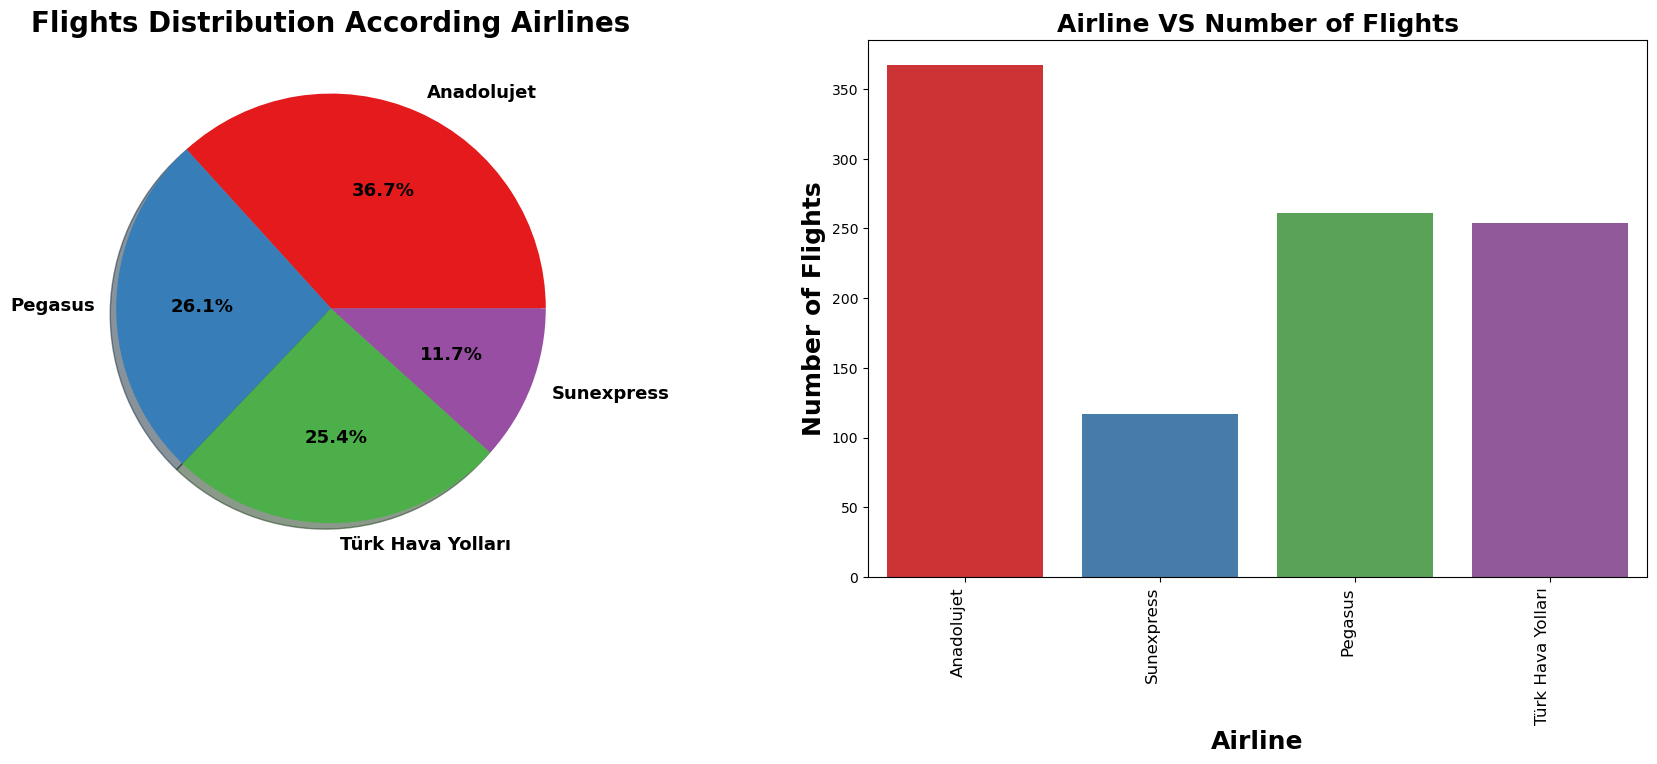

In [515]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart
df['Airline'].value_counts().plot.pie(
    autopct='%2.1f%%',
    textprops={'fontsize': 13, 'fontweight': 'bold'},
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Flights Distribution According Airlines', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Count plot
sns.countplot(x='Airline', data=df, ax=ax[1])  # Specify 'x' parameter
ax[1].set_title('Airline VS Number of Flights', fontsize=18, fontweight='bold')
ax[1].set_xlabel("Airline", fontsize=18, fontweight='bold')
ax[1].set_ylabel("Number of Flights", fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=90, ha='right')
plt.tight_layout(pad=2)
plt.show()


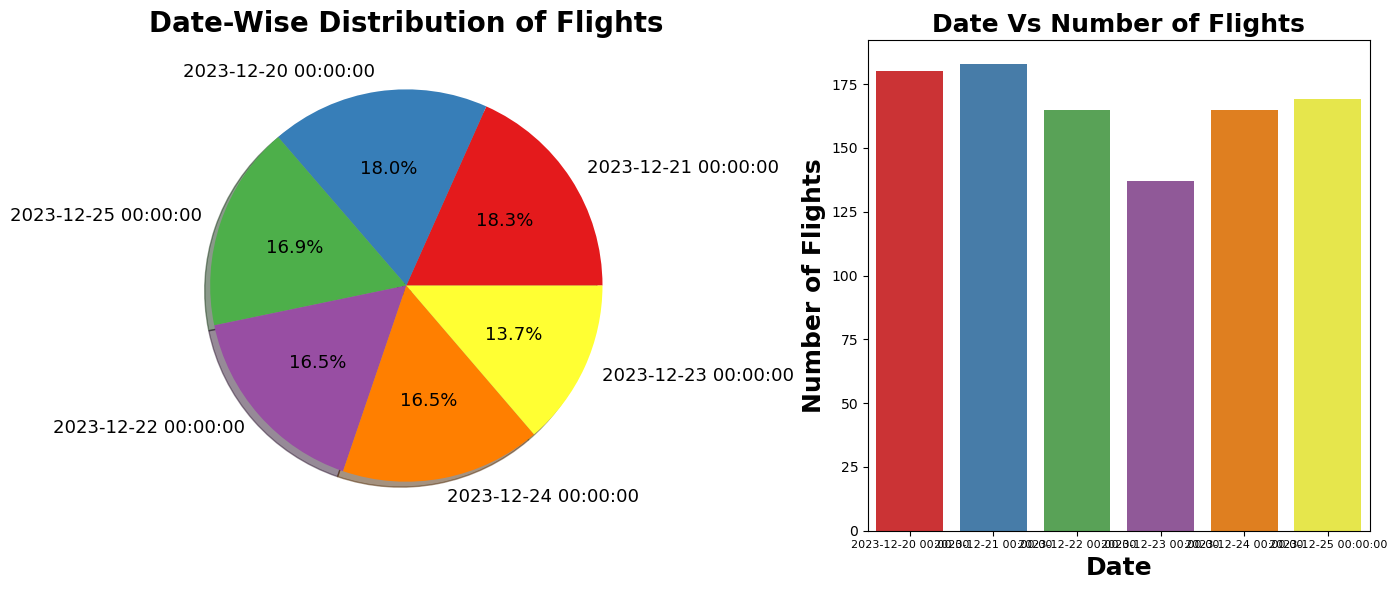

In [516]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f, ax = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
df['Flight Date'].value_counts().plot.pie(
    autopct='%2.1f%%',
    textprops={'fontsize': 13},
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Date-Wise Distribution of Flights', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Count plot
sns.countplot(x='Flight Date', data=df, ax=ax[1])
ax[1].set_title('Date Vs Number of Flights', fontsize=18, fontweight='bold')
ax[1].set_xlabel("Date", fontsize=18, fontweight='bold')
ax[1].set_ylabel("Number of Flights", fontsize=18, fontweight='bold')
plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()
